# "First Try" Notebook
### Mainly on 15min and hourly ticker 
This first notebook is there to first dive into the different statistical analysis tools, and have a better understanding of the process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sqlalchemy

import statsmodels.api as sm
import statsmodels.tsa as smt
import statsmodels.graphics.tsaplots as smp 

In [ ]:
# zertyuiop

# Importing and preping the data

In [2]:
all_crypto_15 = pd.read_csv('../data/ALL_15.csv')
all_crypto_15.head()

,open_time,close_AAVEUSDT,close_AUTOUSDT,close_BCHUSDT,close_BETHUSDT,close_BIFIUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_GMXUSDT,...,close_ILVUSDT,close_KP3RUSDT,close_LTCUSDT,close_MKRUSDT,close_PAXGUSDT,close_QNTUSDT,close_QUICKUSDT,close_XMRUSDT,close_YFIIUSDT,close_YFIUSDT
0,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,298.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,4280.00,299.39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:45:00,NaN,NaN,NaN,NaN,NaN,NaN,4310.07,299.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4308.83,301.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# all_crypto_15.info()
top_history_depth = pd.DataFrame(all_crypto_15.count().sort_values(ascending=False).head(7)).reset_index()
list_column = top_history_depth["index"].iloc[1:].to_list()
list_crypto = top_history_depth["index"].str.split("_",expand=True).iloc[1:,1].to_list()
print(list_column)
print(list_crypto)

['close_ETHUSDT', 'close_BTCUSDT', 'close_BNBUSDT', 'close_LTCUSDT', 'close_XMRUSDT', 'close_BCHUSDT']
['ETHUSDT', 'BTCUSDT', 'BNBUSDT', 'LTCUSDT', 'XMRUSDT', 'BCHUSDT']


We want to have enough data, and don't want to select all the crypto at first so we will focus on the first 6 crypto in history depth

In [4]:
working_df = all_crypto_15.set_index('open_time')[list_column].dropna()
working_df.index = pd.to_datetime(working_df.index)
working_df = working_df.loc['2021']

# Statistical Analysis
### -ADF

In [7]:
adf_columns = ["adf","pvalue","usedlag","#_of_obs","critical values","icbest"]#,"1%","5%","10%"]

In [8]:
adf_df = pd.DataFrame(columns = adf_columns)
for ticker in working_df.columns :
    print(ticker)
    ans = smt.stattools.adfuller(np.array(working_df[ticker].dropna().values,dtype = 'float32'))
    
    ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
    ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
    ans_df.drop('critical values',axis=1)

    adf_df = pd.concat([adf_df,ans_df],axis = 0)

close_ETHUSDT
close_BTCUSDT
close_BNBUSDT
close_LTCUSDT
close_XMRUSDT
close_BCHUSDT


In [9]:
adf_df

,adf,pvalue,usedlag,#_of_obs,critical values,icbest,1%,5%,10%
close_ETHUSDT,-1.957046,0.305718,50,34924,"{'1%': -3.430537257493666, '5%': -2.8616227631...",291108.893856,-3.430537,-2.861623,-2.566814
close_BTCUSDT,-2.308814,0.169141,20,34954,"{'1%': -3.4305370967642093, '5%': -2.861622692...",475077.803165,-3.430537,-2.861623,-2.566814
close_BNBUSDT,-2.023074,0.276548,52,34922,"{'1%': -3.430537268218783, '5%': -2.8616227679...",164584.807717,-3.430537,-2.861623,-2.566814
close_LTCUSDT,-2.793921,0.059147,51,34923,"{'1%': -3.430537262856071, '5%': -2.8616227655...",127042.745409,-3.430537,-2.861623,-2.566814
close_XMRUSDT,-2.575343,0.098201,52,34922,"{'1%': -3.430537268218783, '5%': -2.8616227679...",140137.433612,-3.430537,-2.861623,-2.566814
close_BCHUSDT,-2.828397,0.054330,51,34923,"{'1%': -3.430537262856071, '5%': -2.8616227655...",214337.104700,-3.430537,-2.861623,-2.566814


In [227]:
# adf_df = pd.DataFrame(columns = adf_columns)
# working_df_diff = working_df.diff()
# for ticker in working_df.columns :
#     print(ticker)
#     ans = smt.stattools.adfuller(np.array(working_df_diff[ticker].dropna().values,dtype = 'float32'))
    
#     ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
#     ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
#     # ans_df.drop('critical values',axis=1)

#     adf_df_diff = pd.concat([adf_df_diff,ans_df],axis = 0)

# adf_df_diff.drop('critical values',axis=1,inplace = True)
# adf_df_diff

# OLS Regression

In our case we decide to model the BTC from other crypto currencies

In [228]:
endog = working_df['close_BTCUSDT']

# endog = sm.add_constant(endog)

exog  = working_df.drop('close_BTCUSDT',axis = 1)

In [229]:
model = sm.OLS(endog= endog,exog = exog)
model_calibrated = model.fit()

model_calibrated.params

close_ETHUSDT      6.784231
close_BNBUSDT    -34.828255
close_LTCUSDT    336.312121
close_XMRUSDT    140.018855
close_BCHUSDT    -91.922752
dtype: float64

In [230]:
model_calibrated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          close_BTCUSDT   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          9.569e+05
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                        0.00
Time:                        01:04:27   Log-Likelihood:                     -3.4075e+05
No. Observations:               34975   AIC:                                  6.815e+05
Df Residuals:                   34970   BIC:                                  6.815e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
close_ETHUSDT     6.7842      0.039    175.392      0.000       6.708       6.860
close_BNBUSDT   -34.8283      0.303   -115.088      0.000     -35.421     -34.235
close_LTCUSDT   336.3121      0.920    365.532      0.000     334.509     338.115
close_XMRUSDT   140.0189      0.815    171.712      0.000     138.421     141.617
close_BCHUSDT   -91.9228      0.339   -271.537      0.000     -92.586     -91.259
==============================================================================
Omnibus:                     1137.895   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1735.436
Skew:                          -0.320   Prob(JB):                         0.00
Kurtosis:                       3.884   Cond. No.                         133.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
spread = working_df['close_BTCUSDT'] - model_calibrated.predict()

To check for cointegration we have to verify the stationarity of the residuals (the spread)

In [240]:
ans = smt.stattools.adfuller(np.array(spread,dtype = 'float32'))
    
ans_df = pd.DataFrame([ans],columns = ["adf","pvalue","usedlag","#_of_obs","critical values","icbest"],index= ["SPREAD"])
ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= ["SPREAD"]))

In [241]:
ans_df

,adf,pvalue,usedlag,#_of_obs,critical values,icbest,1%,5%,10%
SPREAD,-7.716469,1.224502e-11,52,34922,"{'1%': -3.430537268218783, '5%': -2.8616227679...",515899.533782,-3.430537,-2.861623,-2.566814


We can conclude that the spread is stationnary (based on the p-value of the ADF test), finally the series are cointegrated
- The question now is to check if the spread is mean or not (if not, then it is harder to use it to trade).
- We will use an AR (1) model.

In [247]:
smt.ar_model.AutoReg(np.array(spread),lags = 1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                34975
Model:                     AutoReg(1)   Log Likelihood             -258573.101
Method:               Conditional MLE   S.D. of innovations            393.215
Date:                Tue, 11 Apr 2023   AIC                         517152.201
Time:                        15:42:08   BIC                         517177.588
Sample:                             1   HQIC                        517160.288
                                34975                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0654      2.105      0.506      0.613      -3.061       5.191
y.L1           0.9954      0.001   1948.113      0.000       0.994       0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0046           +0.0000j            1.0046            0.0000
-----------------------------------------------------------------------------
"""

c:\Users\Titouan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


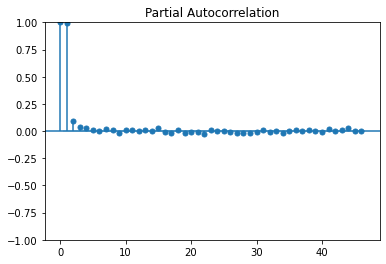

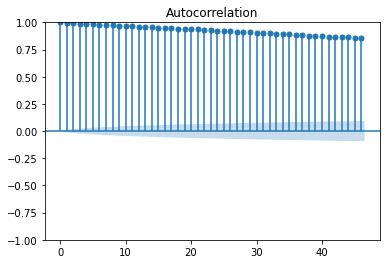

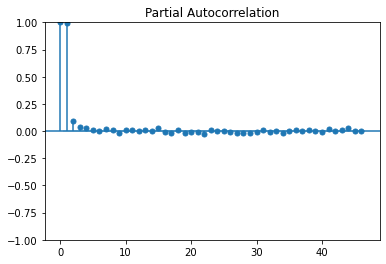

In [252]:
smp.plot_acf(spread)
smp.plot_pacf(spread)

The spread fit an AR(1) model

# Plots

In [232]:
price_df_norm = working_df.dropna().copy()
for c in price_df_norm.columns : 
    price_df_norm[c] = price_df_norm[c] / price_df_norm[c].iloc[0]

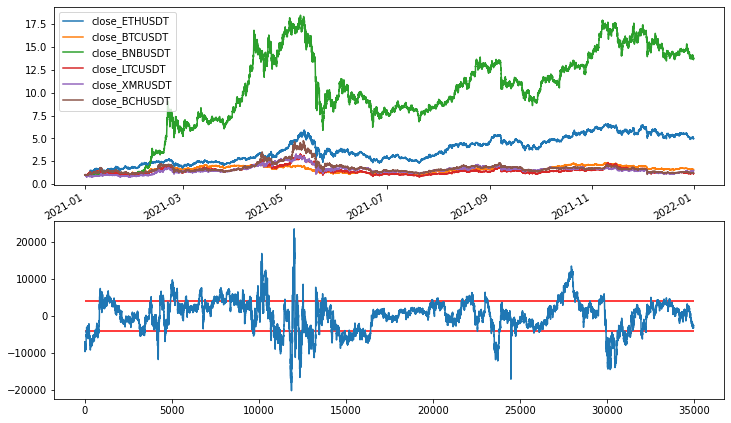

In [233]:
fig,ax = plt.subplots(2,1,figsize = (12,8))
price_df_norm.plot(ax = ax[0])


ax[1].plot(spread.values)
ax[1].hlines(np.std(spread),xmin = 0,xmax = len(spread),color = 'r')
ax[1].hlines(-np.std(spread),xmin = 0,xmax = len(spread),color = 'r')

In [235]:
working_df.corr()

,close_ETHUSDT,close_BTCUSDT,close_BNBUSDT,close_LTCUSDT,close_XMRUSDT,close_BCHUSDT
close_ETHUSDT,1.000000,0.561460,0.873473,0.336048,0.427960,0.297135
close_BTCUSDT,0.561460,1.000000,0.631515,0.670692,0.503091,0.384119
close_BNBUSDT,0.873473,0.631515,1.000000,0.551927,0.690279,0.510944
close_LTCUSDT,0.336048,0.670692,0.551927,1.000000,0.802080,0.888887
close_XMRUSDT,0.427960,0.503091,0.690279,0.802080,1.000000,0.891734
close_BCHUSDT,0.297135,0.384119,0.510944,0.888887,0.891734,1.000000


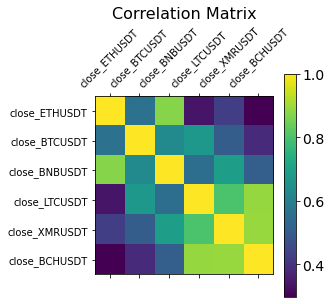

In [238]:
plt.matshow(working_df.corr())

plt.xticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Comparing the different years
(only the regression and spread)

In [253]:
working_df = all_crypto_15.set_index('open_time')[list_column].dropna()
working_df.index = pd.to_datetime(working_df.index)

In [259]:
all_years = working_df.index.year.unique().to_list()

In [267]:
for year in all_years : 
    year_df = working_df.loc[str(year)]

    endog = year_df['close_BTCUSDT']
    exog  = year_df.drop('close_BTCUSDT',axis = 1)

    model = sm.OLS(endog= endog,exog = exog)
    model_calibrated = model.fit()

    model_calibrated.save(f'../models/OLS/ols_{year}.pk')

    

    

In [275]:
params_df = pd.DataFrame()
for year in all_years :
    model_loaded = model_calibrated.load(f'../models/OLS/ols_{year}.pk')
    params_df = pd.concat([params_df,pd.DataFrame([model_loaded.params],index = [year])])

In [276]:
params_df

,close_ETHUSDT,close_BNBUSDT,close_LTCUSDT,close_XMRUSDT,close_BCHUSDT
2019,-125.692464,149.128735,213.174687,174.192392,22.655598
2020,10.032820,-77.018298,123.600247,56.278914,-7.934355
2021,6.784231,-34.828255,336.312121,140.018855,-91.922752
2022,4.012349,25.511388,-67.921371,24.550112,66.524891
2023,22.259928,-2.720570,-13.912481,-36.121247,-36.742498


No real stability on YoY coeficient

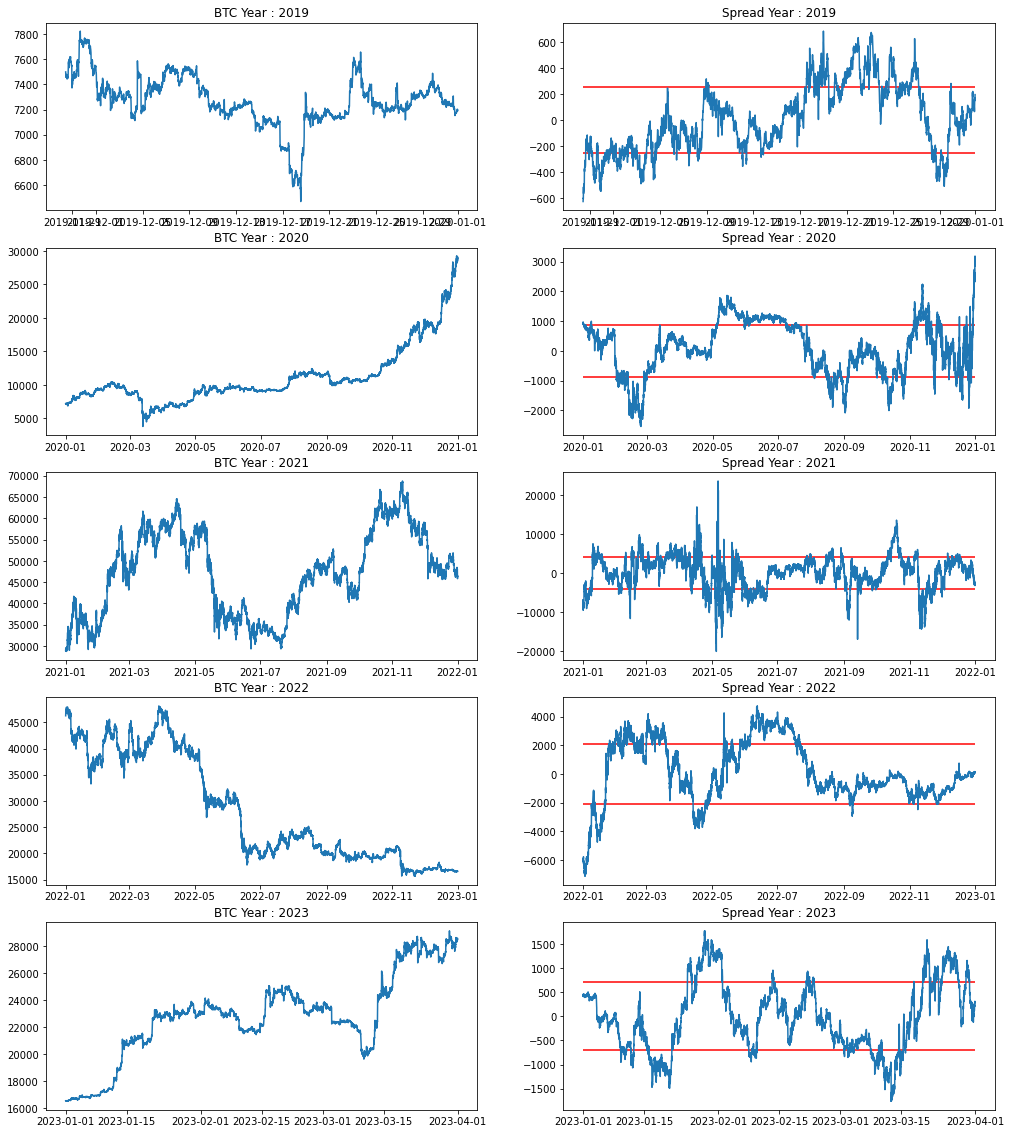

In [299]:
fig,ax = plt.subplots(len(all_years),2,figsize= (17,20))
for i  in range(len(all_years)) :
    year = all_years[i]
    model_loaded = model_calibrated.load(f'../models/OLS/ols_{year}.pk')
    spread = working_df.loc[str(year)]['close_BTCUSDT'] - model_loaded.predict()

    xmin = working_df.loc[str(year)]['close_BTCUSDT'].index[0]
    xmax = working_df.loc[str(year)]['close_BTCUSDT'].index[-1]

    ax[i][1].plot(spread, label = year)
    ax[i][1].hlines(np.std(spread),xmin = xmin,xmax = xmax,color = 'r')
    ax[i][1].hlines(-np.std(spread),xmin = xmin,xmax = xmax,color = 'r')
    ax[i][1].set_title(f'Spread Year : {year}')

    ax[i][0].plot(working_df.loc[str(year)]['close_BTCUSDT'])
    ax[i][0].set_title(f'BTC Year : {year}')
    

In [301]:
import matplotlib as m